In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Prepare for sample datasets

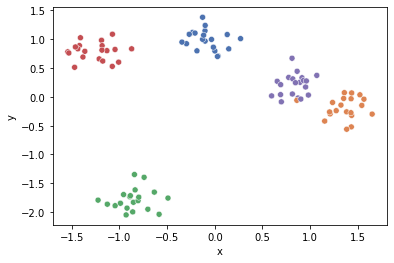

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X_train, true_labels = make_blobs(n_samples=100, centers=5, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
X_train[0]

array([-0.74102254, -1.39810733])

### Model

In [8]:
def l2_distance(point,center):
    return np.sqrt(np.sum((point-center)**2,axis = 1))

In [22]:
import random
random.choices(X_train,k=5)

[array([-1.18151491,  0.88512056]),
 array([-1.13101128,  0.7986027 ]),
 array([ 1.43559779, -0.32426679]),
 array([-1.13101128,  0.7986027 ]),
 array([-1.04501581, -1.89004139])]

In [45]:
def find_center(data,centers):
    return np.array([np.argmin(l2_distance(x,centers)) for x in data])

In [99]:
def kmeans(data,n_iter,num_clusters):
    #initiate center
    center = random.choices(X_train,k=5)
    unique_groups = range(num_clusters)
    for i in range(n_iter):
        groups = find_center(data,center)
        group_means = [np.mean(data[groups == g],axis = 0) for g in unique_groups]
        if set([tuple(x) for x in center]) == set([tuple(x) for x in group_means]):
            break
        center = group_means
    return groups

In [106]:
kmeans_label = kmeans(X_train,1000,5)

In [107]:
kmeans_label

array([4, 1, 3, 1, 0, 4, 2, 2, 2, 3, 3, 4, 1, 3, 2, 0, 1, 1, 4, 0, 0, 2,
       3, 4, 0, 0, 1, 1, 1, 2, 4, 0, 1, 1, 1, 0, 3, 3, 3, 2, 4, 2, 2, 2,
       0, 3, 3, 4, 0, 1, 1, 2, 2, 4, 2, 0, 1, 1, 3, 3, 2, 3, 0, 4, 0, 4,
       1, 1, 4, 1, 0, 4, 4, 4, 1, 0, 2, 0, 1, 4, 1, 4, 0, 2, 0, 3, 0, 3,
       3, 3, 0, 3, 4, 2, 4, 3, 4, 3, 2, 2])

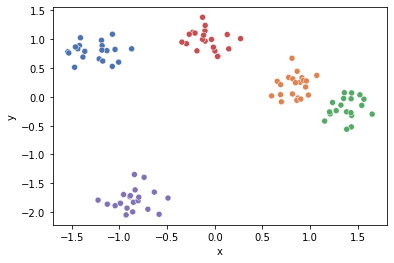

In [108]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=kmeans_label,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

If initiate centers badly, clusters could be wrong. But why?

ChatGPT:

There are several reasons why K-means may fail to find the best groups or optimal clustering solution:

    Initial Centroid Placement: K-means is sensitive to the initial placement of cluster centroids. Different initializations may lead to different local optima, and the algorithm may converge to a suboptimal clustering solution. To address this, K-means can be run multiple times with different random initializations, and the best clustering result can be selected based on a chosen criterion.

    Non-Convex Clusters: K-means assumes that clusters are convex and isotropic, which means they have a roughly spherical shape and uniform density. If the data contains non-convex clusters or clusters with irregular shapes, K-means may struggle to find the correct grouping.

    Unequal Cluster Sizes: K-means tends to create clusters with roughly equal sizes. If the data contains clusters with significantly different sizes, K-means may not capture the smaller clusters effectively.

    Outliers: K-means is sensitive to outliers as they can heavily influence the centroid positions and cluster assignments. Outliers may cause K-means to create suboptimal clusters.

    High-Dimensional Data: K-means can be less effective in high-dimensional spaces due to the "curse of dimensionality." In high dimensions, data points become more sparse, and the distance metrics may not accurately represent the similarity between data points.

    Incorrect Choice of K: Choosing the right number of clusters (K) is critical in K-means. If K is not selected correctly, the clustering may not accurately represent the underlying data structure. Determining the optimal K can be challenging and may require domain knowledge or using validation metrics like the elbow method or silhouette score.

    Imbalanced Data: If the data is imbalanced, meaning some clusters have significantly more data points than others, K-means may prioritize larger clusters over smaller ones, leading to suboptimal results.

To address these issues, various modifications and improvements to the K-means algorithm have been proposed, such as K-means++, K-means with different distance metrics, and using other clustering algorithms like DBSCAN or hierarchical clustering, which can handle some of these challenges more effectively. Additionally, visualizing the data and conducting exploratory data analysis can help gain insights into the data distribution and guide the choice of clustering algorithm and parameters.

Takeaways from ChatGPT: sensitive to initial centers and outliers and num_k 

Improvement: kmeans++ (update centers more smartly), density based clustering like DBSCAN